# Import relevant libraries

In [2]:
import pandas as pd

# Import COVID-19 Fake News Dataset

In [100]:
df = pd.read_excel("fake_new_dataset.csv")
df.head(7)

,Unnamed: 0,title,text,subcategory,label
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0
5,5,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,false news,0
6,6,Delhi: Eight nurses test positive for Covid-19...,Delhi: Eight nurses test positive for Covid-19...,true,1


# Basic Information

In [7]:
df.dtypes

Unnamed: 0      int64
title          object
text           object
subcategory    object
label           int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3119 non-null   int64 
 1   title        3118 non-null   object
 2   text         3119 non-null   object
 3   subcategory  3119 non-null   object
 4   label        3119 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 122.0+ KB


# Check missing values

In [10]:
missing = df.isnull().any().sum()
missing

1

In [15]:
missing = df.isnull().sum()
missing

Unnamed: 0     0
title          1
text           0
subcategory    0
label          0
dtype: int64

In [17]:
col = df.columns[df.isnull().any()].tolist()
col

['title']

# Drop irrelevant column

In [20]:
df = df.drop(columns=['Unnamed: 0'])
df

,title,text,subcategory,label
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0
...,...,...,...,...
3114,2019-nCoV: Health dept. on full alert,Quarantine advised for 80 persons across the S...,true,1
3115,Screening machine for corona virus launched at...,South Sudan has begun screening all travelers ...,true,1
3116,Coronavirus (2019-nCoV),Coronavirus (2019-nCoV) is a new respiratory i...,true,1
3117,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,false news,0


# Drop Missing Value

In [23]:
df = df.dropna(subset=['title'])

In [25]:
df

,title,text,subcategory,label
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0
...,...,...,...,...
3114,2019-nCoV: Health dept. on full alert,Quarantine advised for 80 persons across the S...,true,1
3115,Screening machine for corona virus launched at...,South Sudan has begun screening all travelers ...,true,1
3116,Coronavirus (2019-nCoV),Coronavirus (2019-nCoV) is a new respiratory i...,true,1
3117,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,false news,0


In [27]:
df['label'].value_counts()

label
1    2061
0    1057
Name: count, dtype: int64

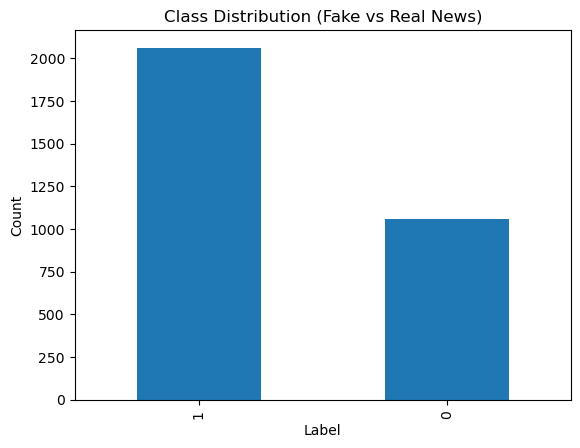

In [29]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Fake vs Real News)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [30]:
!pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Lowercasing

In [33]:
def lowercase_text(text):
    return text.lower()

# Overwrite original columns safely
df.loc[:, 'title'] = df['title'].apply(lowercase_text)
df.loc[:, 'text'] = df['text'].apply(lowercase_text)

In [35]:
df

,title,text,subcategory,label
0,facebook deletes michigan anti-lockdown group ...,facebook has shuttered a popular group for mic...,false news,0
1,other viewpoints: covid-19 is worse than the flu,we can now officially put to rest all comparis...,true,1
2,bermuda's covid-19 cases surpass 100,the ministry of health in bermuda has confirme...,true,1
3,purdue university says students face 'close to...,"purdue university president mitch daniels, the...",partially false,0
4,the high cost of locking down america: “we’ve ...,locking down much of the country may have help...,false news,0
...,...,...,...,...
3114,2019-ncov: health dept. on full alert,quarantine advised for 80 persons across the s...,true,1
3115,screening machine for corona virus launched at...,south sudan has begun screening all travelers ...,true,1
3116,coronavirus (2019-ncov),coronavirus (2019-ncov) is a new respiratory i...,true,1
3117,characterizing patients hospitalized with covi...,characterizing patients hospitalized with covi...,false news,0


# Remove URLS

In [38]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', "", text)

df.loc[:, 'title'] = df['title'].apply(remove_urls)
df.loc[:, 'text'] = df['text'].apply(remove_urls)
df

,title,text,subcategory,label
0,facebook deletes michigan anti-lockdown group ...,facebook has shuttered a popular group for mic...,false news,0
1,other viewpoints: covid-19 is worse than the flu,we can now officially put to rest all comparis...,true,1
2,bermuda's covid-19 cases surpass 100,the ministry of health in bermuda has confirme...,true,1
3,purdue university says students face 'close to...,"purdue university president mitch daniels, the...",partially false,0
4,the high cost of locking down america: “we’ve ...,locking down much of the country may have help...,false news,0
...,...,...,...,...
3114,2019-ncov: health dept. on full alert,quarantine advised for 80 persons across the s...,true,1
3115,screening machine for corona virus launched at...,south sudan has begun screening all travelers ...,true,1
3116,coronavirus (2019-ncov),coronavirus (2019-ncov) is a new respiratory i...,true,1
3117,characterizing patients hospitalized with covi...,characterizing patients hospitalized with covi...,false news,0


# remove punctuation

In [43]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
    
#storing the puntuation free text
df.loc[:, 'title'] = df['title'].apply(remove_punctuation)
df.loc[:, 'text'] = df['text'].apply(remove_punctuation)

In [48]:
df

,title,text,subcategory,label
0,facebook deletes michigan antilockdown group w...,facebook has shuttered a popular group for mic...,false news,0
1,other viewpoints covid19 is worse than the flu,we can now officially put to rest all comparis...,true,1
2,bermudas covid19 cases surpass 100,the ministry of health in bermuda has confirme...,true,1
3,purdue university says students face close to ...,purdue university president mitch daniels the ...,partially false,0
4,the high cost of locking down america “we’ve s...,locking down much of the country may have help...,false news,0
...,...,...,...,...
3114,2019ncov health dept on full alert,quarantine advised for 80 persons across the s...,true,1
3115,screening machine for corona virus launched at...,south sudan has begun screening all travelers ...,true,1
3116,coronavirus 2019ncov,coronavirus 2019ncov is a new respiratory illn...,true,1
3117,characterizing patients hospitalized with covid19,characterizing patients hospitalized with covi...,false news,0


# Tokenization

In [66]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
!pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.9 MB/s  0:00:013.9 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.2/653.2 kB 1.7 MB/s  0:00:00? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.1/741.1 kB 1.3 MB/s  0:00:001.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.4 MB/s  0:00:00m 1.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [spacy]m━━ 14/15 [spacy][thinc]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [82]:
import pandas as pd
from spacy.lang.en import English

# Load SpaCy English tokenizer
nlp = English()

# Define a function to tokenize text using SpaCy
def spacy_tokenize(text):
    if pd.isna(text):
        return []  # handle missing values
    doc = nlp(str(text))
    # Create list of tokens
    token_list = [token.text for token in doc]
    return token_list

# Apply the tokenizer to your original columns
df.loc[:, 'title'] = df['title'].apply(spacy_tokenize)
df.loc[:, 'text'] = df['text'].apply(spacy_tokenize)

In [84]:
df

,title,text,subcategory,label
0,"[facebook, deletes, michigan, antilockdown, gr...","[facebook, has, shuttered, a, popular, group, ...",false news,0
1,"[other, viewpoints, covid19, is, worse, than, ...","[we, can, now, officially, put, to, rest, all,...",true,1
2,"[bermudas, covid19, cases, surpass, 100]","[the, ministry, of, health, in, bermuda, has, ...",true,1
3,"[purdue, university, says, students, face, clo...","[purdue, university, president, mitch, daniels...",partially false,0
4,"[the, high, cost, of, locking, down, america, ...","[locking, down, much, of, the, country, may, h...",false news,0
...,...,...,...,...
3114,"[2019ncov, health, dept, on, full, alert]","[quarantine, advised, for, 80, persons, across...",true,1
3115,"[screening, machine, for, corona, virus, launc...","[south, sudan, has, begun, screening, all, tra...",true,1
3116,"[coronavirus, 2019ncov]","[coronavirus, 2019ncov, is, a, new, respirator...",true,1
3117,"[characterizing, patients, hospitalized, with,...","[characterizing, patients, hospitalized, with,...",false news,0


In [86]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df.loc[:, 'title'] = df['title'].apply(remove_stopwords)
df.loc[:, 'text'] = df['text'].apply(remove_stopwords)

In [87]:
df

,title,text,subcategory,label
0,"[facebook, deletes, michigan, antilockdown, gr...","[facebook, shuttered, popular, group, michigan...",false news,0
1,"[viewpoints, covid19, worse, flu]","[officially, put, rest, comparisons, covid19, ...",true,1
2,"[bermudas, covid19, cases, surpass, 100]","[ministry, health, bermuda, confirmed, newspap...",true,1
3,"[purdue, university, says, students, face, clo...","[purdue, university, president, mitch, daniels...",partially false,0
4,"[high, cost, locking, america, “, ’ve, seen, y...","[locking, much, country, may, helped, “, flatt...",false news,0
...,...,...,...,...
3114,"[2019ncov, health, dept, full, alert]","[quarantine, advised, 80, persons, across, sta...",true,1
3115,"[screening, machine, corona, virus, launched, ...","[south, sudan, begun, screening, travelers, ai...",true,1
3116,"[coronavirus, 2019ncov]","[coronavirus, 2019ncov, new, respiratory, illn...",true,1
3117,"[characterizing, patients, hospitalized, covid19]","[characterizing, patients, hospitalized, covid...",false news,0


In [90]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df.loc[:, 'title'] = df['title'].apply(lemmatize_word)
df.loc[:, 'text'] = df['text'].apply(lemmatize_word)

In [91]:
df

,title,text,subcategory,label
0,facebook deletes michigan antilockdown group 3...,facebook shuttered popular group michigander o...,false news,0
1,viewpoint covid19 worse flu,officially put rest comparison covid19 influen...,true,1
2,bermuda covid19 case surpass 100,ministry health bermuda confirmed newspaper re...,true,1
3,purdue university say student face close zero ...,purdue university president mitch daniel forme...,partially false,0
4,high cost locking america “ ’ve seen year ’s w...,locking much country may helped “ flatten curv...,false news,0
...,...,...,...,...
3114,2019ncov health dept full alert,quarantine advised 80 person across state rece...,true,1
3115,screening machine corona virus launched jia,south sudan begun screening traveler airport h...,true,1
3116,coronavirus 2019ncov,coronavirus 2019ncov new respiratory illness p...,true,1
3117,characterizing patient hospitalized covid19,characterizing patient hospitalized covid19 ap...,false news,0


from sklearn.model_selection import train_test_split

# Combine title and text into a single feature
df['combined_text'] = df['title'].apply(lambda x: ' '.join(x)) + ' ' + df['text'].apply(lambda x: ' '.join(x))

# Features and labels
X = df['combined_text']
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [94]:
from sklearn.model_selection import train_test_split

# Features as two separate columns
X = df[['title', 'text']]  # keep as DataFrame with two columns
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2, 2494]